# Tittel

## Hensikt

## Teori

En modell for smittespredning av sykdommer, som vi skal ta som utgangspunkt i dette prosjektet, er:

$$I_{t+1} = I_t + aI_t$$

Modellen sier at antall smittede etter en viss tid er lik summen av en gammel verdi av antall smittede og den gamle verdien av antall smittede multiplisert med en konstant.
-En ny verdi av antall smittede er lik en gammel verdi og en vekstfaktor.-
Symbolet $I_{t+1}$ betyr antall smittede på dette tidspunktet.
$I_t$ betyr en gammel verdi av antall smittede.
$a$ betyr en konstant, som i dette tilfellet også er en vekstfaktor. 
Leddet $aI_t$ er altså en endring i antall smittede.

Det vil være hensiktsmessig å bruke en slik modell for prosesser som følger et fast mønster og som er kontinuerlige, som f.eks en bakteriekultur i et "bestemt(?)" miljø. I motsetning så ville den ikke fungert for corona ettersom vi påvirker smittespredningen gjennom tiltak osv.

Det som begrenser modellen er at den ikke er kontinuerlig, noe som gjør den lite robust. Dersom prosessen den måler ikke har et fast mønster (er eksponentiell(?), vil det være vanskelig å få et helhetlig bilde av utviklingen. 


"""
In+1 = In + aInSn
Sn+1 = Sn - aInSn

aInSn bør stå for seg selv og bli kalt "endring". Problematisk at In+1 = In + aInSn står foran Sn+1 = Sn - aInSn fordi det da vil være en ny verdi av In+1 når vi beregner Sn+1, og begge må bli regnet samtidig med samme verdi.
"""

Nedenfor er et eksempel på modellen, med en populasjon på 157759 og kontaktrate på 0.2 hver uke over 48 uker:

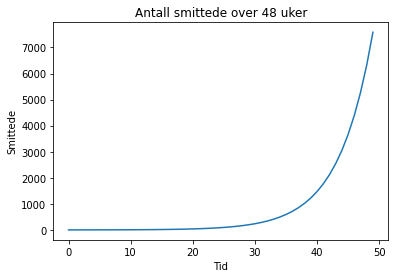

In [ ]:
import matplotlib.pyplot as plt

P = 157759 # populasjonsstørrelse
a = 0.2 # kontaktrate over populasjonsstørrelse
tid_slutt = 48 
I = 1 # antall smittede
t = 0 # tid

smittede = [0]
tid = [0]

while t <= tid_slutt:
  I = I + a*I
  t = t + 1
  smittede.append(I)
  tid.append(t)
 

plt.plot(tid, smittede)
plt.xlabel("Tid")
plt.ylabel("Smittede")
plt.title("Antall smittede over 48 uker")
plt.show()


Beskriv utviklingen. Varier systematisk a og antall smittede til å begynne med. Kommenter hva som skjer.

Hvorfor er det viktig at kontaktraten har en enhet (her: uker)?

Vi går videre til en mer komplisert versjon av modellen, som har en til variabel: 

$$I_{t+1} = I_t + aI_tS_t $$

Den nye variablen, er "S", som står for "Susceptibles" eller mottakelige på norsk. Dette er er en variabel som tar for seg de som allerede er smittet, og sier at de ikke kan bli smittet igjen. Vi kan gjøre det fordi...

En modell for S basert på modellen for I, kan se slik ut:

$$ S_{t+1} = S_t - aI_tS_t $$

Nedenfor har vi plottet inn antall smittede, med den nye modellen for antall mottakelige.

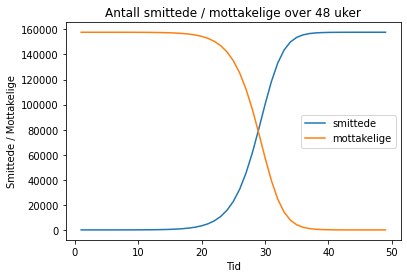

In [ ]:
import matplotlib.pyplot as plt

P = 157759 # populasjonsstørrelse
a = 0.5/P # kontaktrate over populasjonsstørrelse
slutt_tid = 48 
I = 1 # antall smittede
S = 157758 # antall mottakelige
t = 0 # tid

smittede = []
mottakelige = []
tid = []


while t <= slutt_tid:
  endring = a*I*S
  I = I + endring
  S = S - endring
  t = t + 1
  smittede.append(I)
  mottakelige.append(S)
  tid.append(t)
  

plt.plot(tid, smittede, label="smittede")
plt.plot(tid, mottakelige, label="mottakelige")
plt.xlabel("Tid")
plt.ylabel("Smittede / Mottakelige")
plt.title("Antall smittede / mottakelige over 48 uker")
plt.legend()
plt.show()


- Beskrivelse av grafen med ord.
- Varier systematisk a og antall smittede til å begynne med. Kommenter hva som skjer.
- I hvilke sammenhenger kan det være hensiktsmessig å bruke en slik modell? Hvilke begrensninger har modellen?


Et uttrykk for antall smittede, der vi også har med en bedringsrate, kan se slik ut:

$$I_{t+1} = I_t + aI_tS_t - bI_t $$

Dette gir da også en modell for antall friskmeldte, R:

$$ R_{t+1} = R_t + bI_t $$

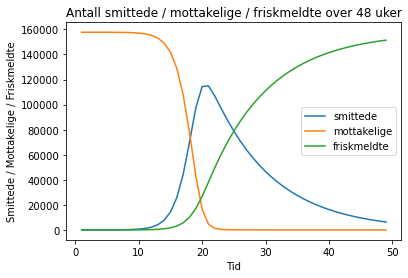

In [38]:
import matplotlib.pyplot as plt

P = 157759 # populasjonsstørrelse
a = 1.0/P # kontaktrate over populasjonsstørrelse
slutt_tid = 48 
I = 1 # antall smittede
S = 157758 # antall mottakelige
R = 0 #antall friskmeldte
b = 0.1
t = 0 # tid

smittede = []
mottakelige = []
friskmeldte = []
tid = []


while t <= slutt_tid:
  endring = a*I*S
  endring2 = b*I
  I = I + endring - endring2
  S = S - endring
  R = R + endring2
  t = t + 1
  smittede.append(I)
  mottakelige.append(S)
  tid.append(t)
  friskmeldte.append(R)
  

plt.plot(tid, smittede, label="smittede")
plt.plot(tid, mottakelige, label="mottakelige")
plt.plot(tid, friskmeldte, label="friskmeldte")
plt.xlabel("Tid")
plt.ylabel("Smittede / Mottakelige / Friskmeldte")
plt.title("Antall smittede / mottakelige / friskmeldte over 48 uker")
plt.legend()
plt.show()

- Forklar alle leddene i modellen for smittede og friskmeldte. Hva er betydningen til b? Hva kan være en ok størrelse for b i dette tilfellet? Diskuter.

Leddene i modellen for smittede er de samme som leddene i modellen vi gikk gjennom tidligere, med unntak av leddet $ -bI_t $. Leddene i modellen for friskmeldte består av antall friskmeldte på dette tidspunktet $R_{t+1}$, antall friskmeldte ved et tidligere tidspunkt $R_t$ og endring i antall friskmeldte $+bI_t$.

$b$ vil si raten antall personer blir friskmeldte. 

Vi tenkte først at det ville være logisk at $b$ var samme rate som folk ble smittet. Dette fungerte ikke. Vi prøvde oss fram ved å dele en konstant på populasjonsstørrelsen, på antall smittede og ved å kun ha en konstant. Alle ga veldig rare grafer. Til slutt prøvde vi oss fram ved tilfeldige tall, til vi kom fram til ett som ga fine grafer som også virket logiske. $b$ ble i vårt tilfelle 0.1.

Grafen starter med like mange mottakelige som det er individer i populasjonen. Etter hvert som antall smittede øker, minker også antall mottakelige. Dette stemmer med den tidligere modellen. Til slutt krysser grafene hverandre og flater ut. Men, i denne modellen flater grafene for antall smittede og mottakelige ikke ut ved toppen og bunnen av intervallet, men rundt 25% og 75%. Dette kan forklares ved flokkimmunitet. Grafen for antall friskmeldte øker omtrent likt som grafen for antall smittede, men ved et senere tidspunkt. 



- I hvilke sammenhenger kan det være hensiktsmessig å bruke en slik modell? Hvilke begrensninger har modellen?

Nedenfor er 

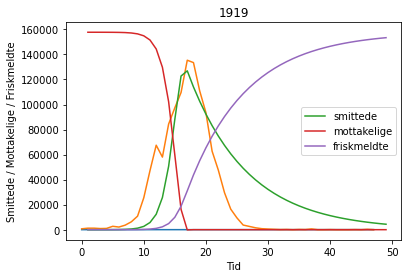

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

#for i in range(0,20):
    #for j in range(0,20):
data = pd.read_csv("https://raw.githubusercontent.com/sunnivater/Smittemoddellering/main/influensa%20og.txt", skiprows = 2) #ikke orginal data, all data ganget med 100
data = data.reset_index(drop = True)

plt.plot(data)


P = 157759 # populasjonsstørrelse
a = 1.3/P # kontaktrate over populasjonsstørrelse
slutt_tid = 48 
I = 1 # antall smittede
S = 157758 # antall mottakelige
R = 0 #antall friskmeldte
b = 0.1
t = 0 # tid

smittede = []
mottakelige = []
friskmeldte = []
tid = []


while t <= slutt_tid:
  endring = a*I*S
  endring2 = b*I
  I = I + endring - endring2
  S = S - endring
  R = R + endring2
  t = t + 1
  smittede.append(I)
  mottakelige.append(S)
  tid.append(t)
  friskmeldte.append(R)

tall = str(i)+ str(j)
titel = "Antall smittede / mottakelige / friskmeldte over 48 uker" #+ tall
plt.plot(tid, smittede, label="smittede")
plt.plot(tid, mottakelige, label="mottakelige")
plt.plot(tid, friskmeldte, label="friskmeldte")
plt.xlabel("Tid")
plt.ylabel("Smittede / Mottakelige / Friskmeldte")
plt.title(tall)
plt.legend()
plt.show()

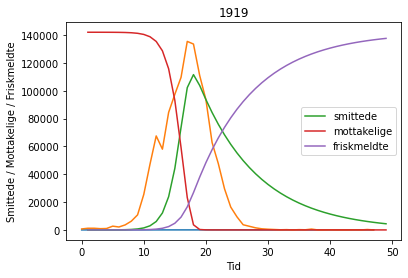

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

#for i in range(0,20):
    #for j in range(0,20):
data = pd.read_csv("https://raw.githubusercontent.com/sunnivater/Smittemoddellering/main/influensa%20og.txt", skiprows = 2) #ikke orginal data, all data ganget med 100
data = data.reset_index(drop = True)

plt.plot(data)


P = 157759 # populasjonsstørrelse
a = 1.3/P # kontaktrate over populasjonsstørrelse
slutt_tid = 48 
I = 1 # antall smittede
S = 157758*0.9 # antall mottakelige med 10 prosent vaksinering
R = 0 #antall friskmeldte
b = 0.1
t = 0 # tid

smittede = []
mottakelige = []
friskmeldte = []
tid = []


while t <= slutt_tid:
  endring = a*I*S
  endring2 = b*I
  I = I + endring - endring2
  S = S - endring
  R = R + endring2
  t = t + 1
  smittede.append(I)
  mottakelige.append(S)
  tid.append(t)
  friskmeldte.append(R)

tall = str(i)+ str(j)
titel = "Antall smittede / mottakelige / friskmeldte over 48 uker" #+ tall
plt.plot(tid, smittede, label="smittede")
plt.plot(tid, mottakelige, label="mottakelige")
plt.plot(tid, friskmeldte, label="friskmeldte")
plt.xlabel("Tid")
plt.ylabel("Smittede / Mottakelige / Friskmeldte")
plt.title(tall)
plt.legend()
plt.show()

## Resultater

## Drøfting

## Konklusjon